In [78]:
#Importamos la librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

server = '.\SQLEXPRESS'
database = 'heart2020'
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;'

connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})

engine = create_engine(connection_url)

cnx = engine.connect()

In [79]:
df = pd.read_sql("SELECT * FROM heart2020.dbo.heart_2020", engine)
df['BMI'] = df['BMI'].astype(float, errors= 'raise')
df['PhysicalHealth'] = df['PhysicalHealth'].astype(float, errors= 'raise')
df['MentalHealth'] = df['MentalHealth'].astype(float, errors= 'raise')
df['SleepTime'] = df['SleepTime'].astype(float, errors= 'raise')

In [80]:
features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','HeartDisease']	#Seleccionamos las variables que queremos analizar
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,28.90,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,No
1,Yes,29.16,Yes,No,Yes,0.0,0.0,No,Male,70-74,White,Yes,Yes,Fair,8.0,No,No,No
2,No,23.57,Yes,No,No,0.0,2.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,Yes
3,No,29.23,Yes,Yes,No,0.0,3.0,No,Female,40-44,White,No,No,Good,9.0,No,No,No
4,No,27.37,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,6.0,No,No,No


In [81]:
X = df.drop(['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race',
'Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'], axis=1)
y = df['Race']

In [82]:
y.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [83]:
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,28.90,0.0,0.0,7.0
1,29.16,0.0,0.0,8.0
2,23.57,0.0,2.0,8.0
3,29.23,0.0,3.0,9.0
4,27.37,0.0,0.0,6.0


In [84]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [85]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=8, random_state = 7) #Creamos el modelo

In [86]:
#Entrenamos el modelo
clf = tree.fit(X_train,y_train)

In [87]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [88]:
y_train_pred.shape

(255836,)

In [89]:
y_test.shape

(63959,)

In [90]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.767366594224425
% de aciertos sobre el set de evaluación: 0.7657249175252896


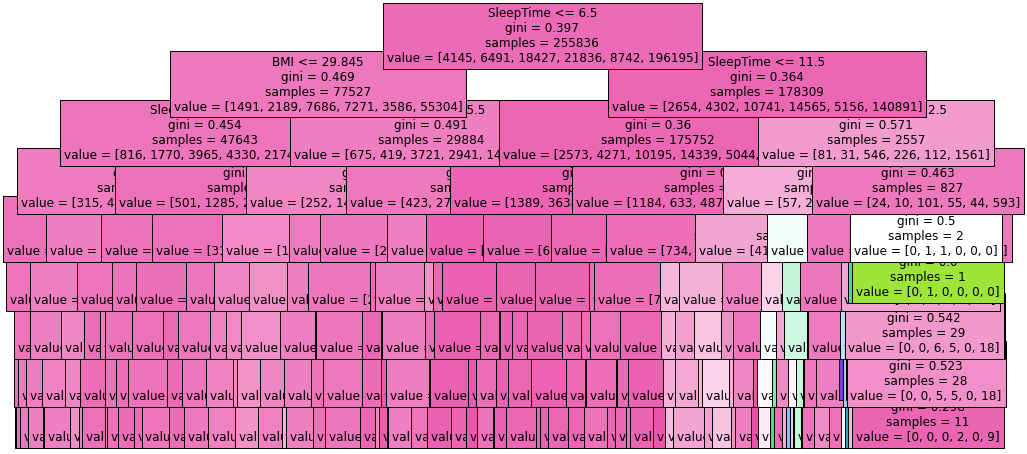

In [91]:
from sklearn.tree import plot_tree # Función para visualizar el árbol
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize = (15, 8))
plot_tree(tree, feature_names=X.columns, fontsize = 12, filled = True, ax = ax)
plt.show()


In [92]:
from sklearn.metrics import plot_confusion_matrix

In [93]:
plot_confusion_matrix(tree, X_test, y_test)  
plt.show()